In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython
import librosa
import librosa.display

In [14]:
name_1 = "ohayoo"
# ーーーー　audio read start　ーーーー
# audio_path_1 = ("sound/" + name_1 + ".wav")
# sr_1 = 16000
# y_1, sr_1 = librosa.load(audio_path_1, sr=sr_1, mono=True)
# ーーーー　audio read end  　ーーーー

csv_path_1 = "Foumant/c_" + name_1 + ".csv"
foumants_1 = open(csv_path_1, 'r')
foumants_list_1 = foumants_1.readlines()
foumants_1.close()

all_frame_1 = len(foumants_list_1)
f1s_1 =  np.zeros(all_frame_1)
f2s_1 =  np.zeros(all_frame_1)
f3s_1 =  np.zeros(all_frame_1)
f4s_1 =  np.zeros(all_frame_1)

itarate = 0
for frame in foumants_list_1:
    # print("FrameCount: " + str(i+1) + "/" + str(all_frame))
    foumant = frame.split(',')
    if float(foumant[0]) > 180:
        f1s_1[itarate] = foumant[0]
        # print("F1: " + foumant[0])
        f2s_1[itarate] = foumant[1]
        # print("F2: " + foumant[1])
        f3s_1[itarate] = foumant[2]
        # print("F3: " + foumant[2])
        f4s_1[itarate] = foumant[3]
        # print("F4: " + foumant[3])
        itarate += 1

In [15]:
name_2 = "VoicePad_konnichiwa_s"

# ーーーー　audio read start　ーーーー
audio_path_2 = ("sound/" + name_2 + ".wav")
sr_2 = 16000
y_2, sr_2 = librosa.load(audio_path_2, sr=sr_2, mono=True)
# ーーーー　audio read end 　ーーーー

csv_path_2 = "Foumant/c_" + name_2 + ".csv"
foumants_2 = open(csv_path_2, 'r')
foumants_list_2 = foumants_2.readlines()
foumants_2.close()

all_frame_2 = len(foumants_list_2)
f1s_2 =  np.zeros(all_frame_2)
f2s_2 =  np.zeros(all_frame_2)
f3s_2 =  np.zeros(all_frame_2)
f4s_2 =  np.zeros(all_frame_2)

itarate = 0
for frame in foumants_list_2:
    # print("FrameCount: " + str(i+1) + "/" + str(all_frame))
    foumant = frame.split(',')
    if float(foumant[0]) > 180:
        f1s_2[itarate] = foumant[0]
        # print("F1: " + foumant[0])
        f2s_2[itarate] = foumant[1]
        # print("F2: " + foumant[1])
        f3s_2[itarate] = foumant[2]
        # print("F3: " + foumant[2])
        f4s_2[itarate] = foumant[3]
        # print("F4: " + foumant[3])
        itarate += 1

(0.0, 3000.0)

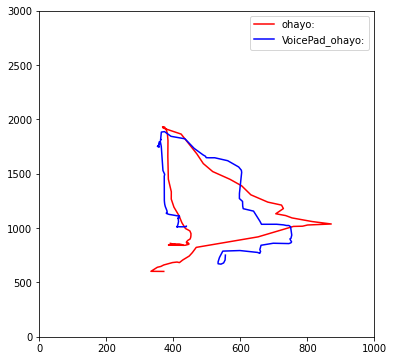

In [18]:
plt.figure(figsize=(6, 6))
plt.plot(f1s_1[:75], f2s_1[:75], color="r", label=name_1)
plt.plot(f1s_2[:166], f2s_2[:166], color="b", label=name_2)
plt.legend()
plt.xlim((0, 1000))
plt.ylim((0, 3000))

In [17]:
fmin, fmax = 100, 520
# Fundamental frequency (F0) estimation using probabilistic YIN (pYIN).
fo_yin_1, voiced_flag_1, voiced_prob_1 = librosa.pyin(y_1, fmin, fmax)
fo_yin_2, voiced_flag_2, voiced_prob_2 = librosa.pyin(y_2, fmin, fmax)
# ーーーー　plot start　ーーーー
plt.subplot(2,1,2)
plt.plot(voiced_flag_1)
plt.title(name_2)

plt.subplot(2,1,1)
plt.plot(voiced_flag_2)
plt.title(name_1)
plt.legend(loc='upper right')

plt.tight_layout()
# ーーーー　plot end　ーーーー
sample = librosa.samples_like(voiced_flag_1)
print(voiced_flag_1)
print(sample)

voiced_1 = []
end_frag_i = len(voiced_flag_1) -1
first_true = False
for i, flag in enumerate(voiced_flag_1):
    if flag and not first_true:
        print("first_true")
        first_true = True
        First_i = i
    if not flag and first_true:
        print("end_true")
        first_true = False
        voiced_1.append(sample[First_i:i])
    if i==end_frag_i and first_true:
        print("end_flags")
        first_true = False
        voiced_1.append(sample[First_i:i])
print(voiced_1)
        

NameError: name 'y_1' is not defined

(257, 49)
CPU times: user 46.9 ms, sys: 31.2 ms, total: 78.1 ms
Wall time: 79.2 ms


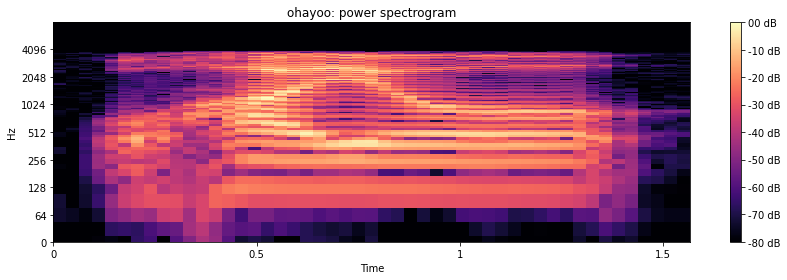

In [301]:
%%time
# 短時間フーリエ変換
n_fft = 512
hop_length = int(n_fft/2)
y_filt = librosa.effects.preemphasis(y_1)
S = np.abs(librosa.stft(y_filt, n_fft=n_fft, hop_length=hop_length))
# デシベル変換
log_S = librosa.amplitude_to_db(S, ref=np.max)
# ーーーー　plot start　ーーーー
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr_1, x_axis='time', y_axis='log')
plt.title(name_1 + ': power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
# ーーーー　plot end　ーーーー
print(log_S.shape)

(257, 82)
CPU times: user 93.8 ms, sys: 0 ns, total: 93.8 ms
Wall time: 82.1 ms


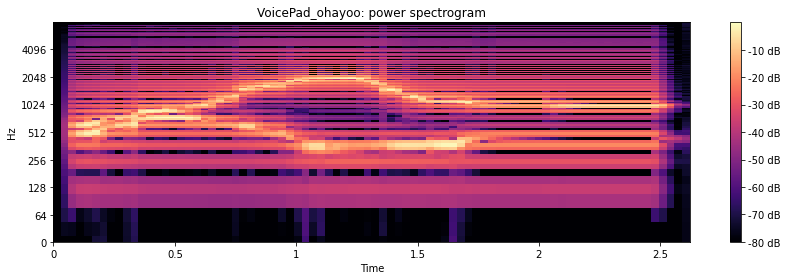

In [302]:
%%time
# 短時間フーリエ変換
n_fft = 512
hop_length = int(n_fft/2)
y_filt = librosa.effects.preemphasis(y_2)
S = np.abs(librosa.stft(y_filt, n_fft=n_fft, hop_length=hop_length))
# デシベル変換
log_S = librosa.amplitude_to_db(S, ref=np.max)
# ーーーー　plot start　ーーーー
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr_2, x_axis='time', y_axis='log')
plt.title(name_2 + ': power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
# ーーーー　plot end　ーーーー
print(log_S.shape)